In [1]:
import pandas as pd

In [5]:
titanic = pd.read_csv('DataAnalysis/data/titanic.csv')
titanic['age'] = titanic['age'].replace(['?'], [None]).astype('float')
titanic['fare'] = titanic['fare'].replace(['?'], [None]).astype('float')

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       1309 non-null   object 
 13  home.dest  1309 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 143.3+ KB


In [8]:
def years_to_days(n):
    return n * 365

In [9]:
titanic['age'].apply(years_to_days)

0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [10]:
def age_group(age):
    if age < 18:
        return 'child'
    elif age < 40:
        return 'adult'
    else:
        return 'senior'

In [13]:
age_group(80)

'senior'

<AxesSubplot:>

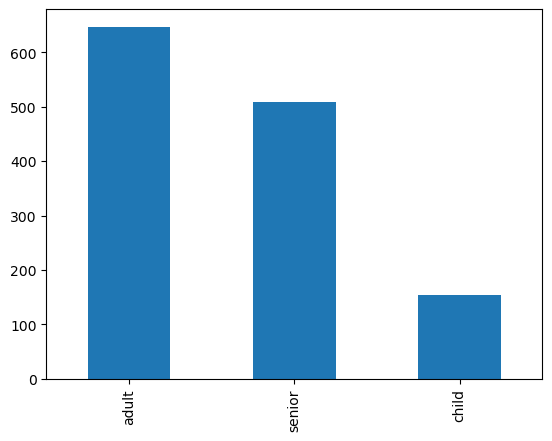

In [16]:
titanic['age'].apply(age_group).value_counts().plot(kind='bar')

In [17]:
titanic['age_group'] = titanic['age'].apply(age_group)

In [18]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON",child
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,?,328,?,child
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,?,C,?,?,?,senior
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,?,C,?,304,?,adult
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,?,C,?,?,?,adult


<AxesSubplot:xlabel='age_group'>

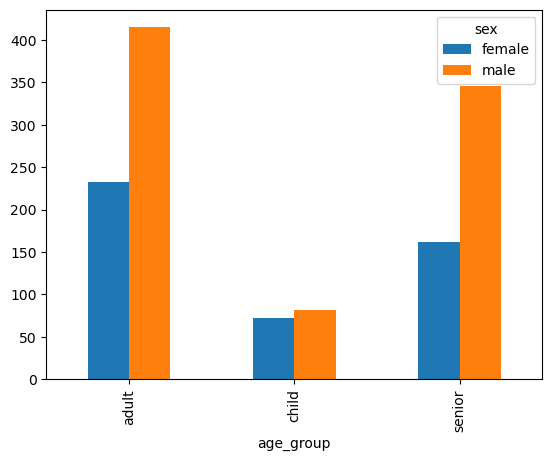

In [29]:
titanic.groupby('age_group').sex.value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='age_group'>

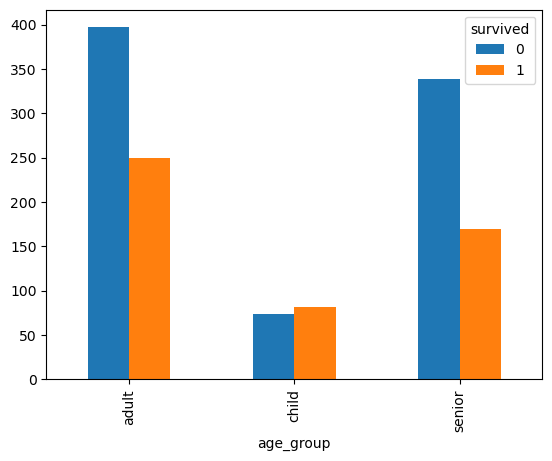

In [31]:
titanic.groupby('age_group').survived.value_counts().unstack().plot(kind='bar')

In [32]:
def convert(num, multy):
    return f'${num * multy}'

In [33]:
convert(2,24)

'$48'

In [36]:
titanic['fare'].apply(convert, args= (24,))

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

In [38]:
df = titanic[['pclass', 'survived', 'age', 'fare']]

In [39]:
df

,pclass,survived,age,fare
0,1,1,29.0000,211.3375
1,1,1,0.9167,151.5500
2,1,0,2.0000,151.5500
3,1,0,30.0000,151.5500
4,1,0,25.0000,151.5500
...,...,...,...,...
1304,3,0,14.5000,14.4542
1305,3,0,NaN,14.4542
1306,3,0,26.5000,7.2250
1307,3,0,27.0000,7.2250


In [40]:
def get_range(s):
    return s.max() - s.min()

In [41]:
df.apply(get_range)

pclass        2.0000
survived      1.0000
age          79.8333
fare        512.3292
dtype: float64

In [42]:
def get_mena(s):
    return s.mean()

In [43]:
df.apply(get_mena)

pclass       2.294882
survived     0.381971
age         29.881135
fare        33.295479
dtype: float64

In [44]:
df.apply(get_range, axis=1)

0       210.3375
1       150.6333
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.5000
1305     14.4542
1306     26.5000
1307     27.0000
1308     29.0000
Length: 1309, dtype: float64

In [46]:
df.apply(get_mena, axis=1)

0       60.584375
1       38.616675
2       38.637500
3       45.637500
4       44.387500
          ...    
1304     7.988550
1305     5.818067
1306     9.181250
1307     9.306250
1308     9.968750
Length: 1309, dtype: float64

In [47]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       1309 non-null   object 
 13  home.dest  1309 non-null   object 
 14  age_group  1309 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 153.5+ KB


In [48]:
def get_fam_aize(s):
    fam_size = s.sibsp + s.parch
    if fam_size == 0:
        return 'Solo'
    elif fam_size < 5:
        return 'Normal'
    else:
        return 'Large'

<AxesSubplot:>

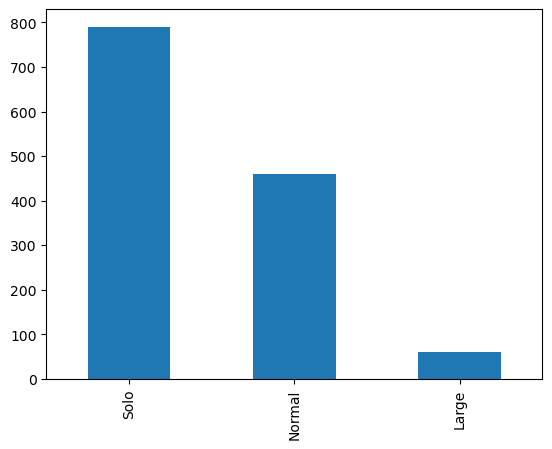

In [52]:
titanic.apply(get_fam_aize, axis=1).value_counts().plot(kind='bar')

In [53]:
titanic['fame_size'] = titanic.apply(get_fam_aize, axis=1)

In [54]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group,fame_size
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO",adult,Solo
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON",child,Normal
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",child,Normal
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON",adult,Normal
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",adult,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,?,328,?,child,Normal
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,?,C,?,?,?,senior,Normal
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,?,C,?,304,?,adult,Solo
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,?,C,?,?,?,adult,Solo


<AxesSubplot:xlabel='fame_size'>

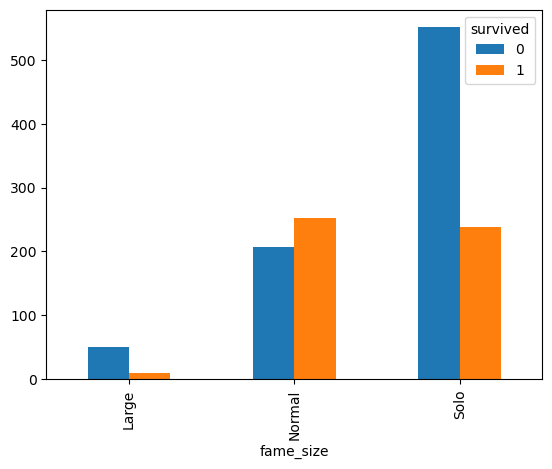

In [61]:
titanic.groupby('fame_size').survived.value_counts().unstack().plot(kind='bar')

In [63]:
titanic['pclass'].map({1 : '1st', 2 : '2nd', 3 : '3rd'})

0       1st
1       1st
2       1st
3       1st
4       1st
       ... 
1304    3rd
1305    3rd
1306    3rd
1307    3rd
1308    3rd
Name: pclass, Length: 1309, dtype: object